
**EDA**


In [167]:
import pandas as pd
import numpy as np
import mitosheet
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import datetime

EDA GOALS:
- Calculate the total number of customers in each section. +
- Calculate the total number of customers in each section over time. +
- Display the number of customers at checkout over time. +
- Calculate the time each customer spent in the market.
- Calculate the total number of customers in the supermarket over time.
- Our business managers think that the first section customers visit follows a different pattern than the following ones. 
- Plot the distribution of customers of their first visited section versus following sections.
- Estimate the total revenue for a customer (section, revenue per minute)

In [168]:
# Imported monday.csv
monday = pd.read_csv(r'data/monday.csv', sep=';')
# Imported tuesday.csv
tuesday = pd.read_csv(r'data/tuesday.csv', sep=';')
# Imported wednesday.csv
wednesday = pd.read_csv(r'data/wednesday.csv', sep=';')
# Imported thursday.csv
thursday = pd.read_csv(r'data/thursday.csv', sep=';')
# Imported friday.csv
friday = pd.read_csv(r'data/friday.csv', sep=';')
    
# Changed timestamp to dtype datetime
#monday['customer_no']=monday['customer_no'].apply(lambda x: str(x)+'_monday')
# Changed timestamp to dtype datetime
#tuesday['customer_no']=tuesday['customer_no'].apply(lambda x: str(x)+'_tuesday')
# Changed timestamp to dtype datetime
#wednesday['customer_no']=wednesday['customer_no'].apply(lambda x: str(x)+'_wednesday')
# Changed timestamp to dtype datetime
#thursday['customer_no']=thursday['customer_no'].apply(lambda x: str(x)+'_thursday')
# Changed timestamp to dtype datetime
#friday['customer_no'] = friday['customer_no']+8000
#friday['customer_no'] = friday['customer_no'].astype(str)
#friday['customer_no']=friday['customer_no'].apply(lambda x: str(x)+'_friday')
# Concatenated 5 into dataframes into df
df = pd.concat([monday, tuesday, wednesday, thursday, friday], join='inner', ignore_index=True, sort=True)


#datetime_series = pd.to_datetime(df['timestamp'])
#datetime_index = pd.DatetimeIndex(datetime_series.values)
#df=df.set_index(datetime_index)
#df.drop('timestamp',axis=1,inplace=True)

df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour

df.set_index("timestamp",inplace=True)

In [169]:
df

,customer_no,location,hour
timestamp,,,
2019-09-02 07:03:00,1,dairy,7
2019-09-02 07:03:00,2,dairy,7
2019-09-02 07:04:00,3,dairy,7
2019-09-02 07:04:00,4,dairy,7
2019-09-02 07:04:00,5,spices,7
...,...,...,...
2019-09-06 21:50:00,1500,dairy,21
2019-09-06 21:50:00,1507,checkout,21
2019-09-06 21:50:00,1508,checkout,21


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 2019-09-02 07:03:00 to 2019-09-06 21:50:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  24877 non-null  int64 
 1   location     24877 non-null  object
 2   hour         24877 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 777.4+ KB


In [171]:
df.sort_index(inplace=True)
df["time"] = df.index.time
df["day"] = df.index.day_name()
df["customer_id"] = df["day"] + "-" + df["customer_no"].astype(str)
df["customer_id"].head()

timestamp
2019-09-02 07:03:00    Monday-1
2019-09-02 07:03:00    Monday-2
2019-09-02 07:04:00    Monday-3
2019-09-02 07:04:00    Monday-4
2019-09-02 07:04:00    Monday-5
Name: customer_id, dtype: object

USING NOTEBOOK GITHUB

In [172]:

enter_datetimes = df.reset_index().groupby("customer_id")["timestamp"].min()

In [173]:
enter_datetimes.head(50)

customer_id
Friday-1      2019-09-06 07:00:00
Friday-10     2019-09-06 07:06:00
Friday-100    2019-09-06 08:03:00
Friday-1000   2019-09-06 17:19:00
Friday-1001   2019-09-06 17:19:00
Friday-1002   2019-09-06 17:19:00
Friday-1003   2019-09-06 17:19:00
Friday-1004   2019-09-06 17:19:00
Friday-1005   2019-09-06 17:19:00
Friday-1006   2019-09-06 17:21:00
Friday-1007   2019-09-06 17:21:00
Friday-1008   2019-09-06 17:21:00
Friday-1009   2019-09-06 17:22:00
Friday-101    2019-09-06 08:03:00
Friday-1010   2019-09-06 17:23:00
Friday-1011   2019-09-06 17:23:00
Friday-1012   2019-09-06 17:24:00
Friday-1013   2019-09-06 17:24:00
Friday-1014   2019-09-06 17:24:00
Friday-1015   2019-09-06 17:25:00
Friday-1016   2019-09-06 17:25:00
Friday-1017   2019-09-06 17:26:00
Friday-1018   2019-09-06 17:26:00
Friday-1019   2019-09-06 17:26:00
Friday-102    2019-09-06 08:04:00
Friday-1020   2019-09-06 17:27:00
Friday-1021   2019-09-06 17:28:00
Friday-1022   2019-09-06 17:28:00
Friday-1023   2019-09-06 17:29:00
Fr

In [174]:
for customer in df["customer_id"].unique():
    df.loc[
        (df.customer_id == customer) & (df.index == enter_datetimes[customer]),
        "section_order",
    ] = "first"

In [175]:
df.tail(20)

,customer_no,location,hour,time,day,customer_id,section_order
timestamp,,,,,,,
2019-09-06 21:47:00,1502,checkout,21,21:47:00,Friday,Friday-1502,NaN
2019-09-06 21:47:00,1503,dairy,21,21:47:00,Friday,Friday-1503,first
2019-09-06 21:47:00,1504,fruit,21,21:47:00,Friday,Friday-1504,first
2019-09-06 21:48:00,1494,fruit,21,21:48:00,Friday,Friday-1494,NaN
2019-09-06 21:48:00,1501,checkout,21,21:48:00,Friday,Friday-1501,NaN
...,...,...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,21,21:50:00,Friday,Friday-1500,NaN
2019-09-06 21:50:00,1507,checkout,21,21:50:00,Friday,Friday-1507,NaN
2019-09-06 21:50:00,1508,checkout,21,21:50:00,Friday,Friday-1508,NaN


In [176]:
#df_full = df.drop(columns=["customer_no"])

In [177]:

df.loc[df["location"] == "checkout", "section_order"] = "checkout"

In [178]:

df["section_order"].fillna("following", inplace=True)

In [179]:
df.head(50)

,customer_no,location,hour,time,day,customer_id,section_order
timestamp,,,,,,,
2019-09-02 07:03:00,1,dairy,7,07:03:00,Monday,Monday-1,first
2019-09-02 07:03:00,2,dairy,7,07:03:00,Monday,Monday-2,first
2019-09-02 07:04:00,3,dairy,7,07:04:00,Monday,Monday-3,first
2019-09-02 07:04:00,4,dairy,7,07:04:00,Monday,Monday-4,first
2019-09-02 07:04:00,5,spices,7,07:04:00,Monday,Monday-5,first
...,...,...,...,...,...,...,...
2019-09-02 07:13:00,22,fruit,7,07:13:00,Monday,Monday-22,first
2019-09-02 07:14:00,13,dairy,7,07:14:00,Monday,Monday-13,following
2019-09-02 07:14:00,18,dairy,7,07:14:00,Monday,Monday-18,following


In [180]:
customers_in_first_sections = (df[df.section_order == "first"].groupby("location")[["customer_id"]].count())
customers_in_first_sections

,customer_id
location,
dairy,2141
drinks,1143
fruit,2810
spices,1351


In [181]:
customers_in_first_sections

,customer_id
location,
dairy,2141
drinks,1143
fruit,2810
spices,1351


In [189]:
total_entries = sum(customers_in_first_sections["customer_id"].to_list())

In [191]:
total_entries

7445

In [192]:
first_probabilities = customers_in_first_sections / total_entries
first_probabilities

,customer_id
location,
dairy,0.287576
drinks,0.153526
fruit,0.377435
spices,0.181464


In [193]:
df.groupby("location")[["customer_id"]].count().sort_values(
    "customer_id", ascending=False
)

,customer_id
location,
checkout,7417
fruit,5122
dairy,4679
drinks,3905
spices,3754


In [182]:
#missing customers from checkout
checkout=set(df[df['location']=='checkout']['customer_no'].unique())
all_customers=set(df['customer_no'].unique())
difference=all_customers.difference(checkout)
for customers in difference:
    df=df.append({'timestamp':'2019-09-02 22:00:00','customer_no':customers,'location':'checkout'}, ignore_index=True)
df[df['timestamp']=='2019-09-02 22:00:00']


,customer_no,location,hour,time,day,customer_id,section_order,timestamp
24877,1532,checkout,NaN,NaN,NaN,NaN,NaN,2019-09-02 22:00:00
24878,1533,checkout,NaN,NaN,NaN,NaN,NaN,2019-09-02 22:00:00
24879,1527,checkout,NaN,NaN,NaN,NaN,NaN,2019-09-02 22:00:00


In [183]:
pd.DataFrame(difference)

,0
0,1532
1,1533
2,1527


Text(0.5, 1.0, 'Customer distribution by location')

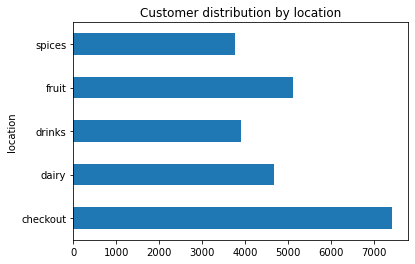

In [184]:
#barplot - Customer distribution by location

df.groupby(['location'])['customer_no'].count().plot.barh()
plt.title('Customer distribution by location')


Text(0.5, 1.0, '% of customers per section')

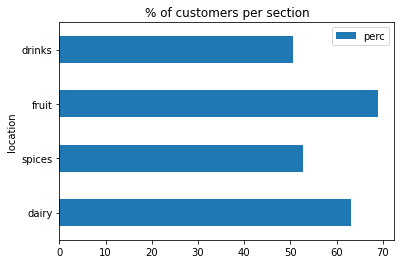

In [185]:
#barplot - Percentage of customers per section
cust_per_aile=df[df['location']!='checkout'].groupby(['location'])['customer_no'].count()
cust_total=df[df['location']=='checkout'].groupby(['location'])['customer_no'].count()
perc_cust=pd.to_numeric(cust_per_aile.values)/pd.to_numeric(cust_total.values)*100
p=pd.concat([pd.DataFrame(perc_cust),pd.DataFrame(pd.unique(df['location'][df['location']!='checkout']))], axis=1)
p.columns=['perc','location']
p.set_index("location", inplace=True)
p.plot.barh()
plt.title('% of customers per section')

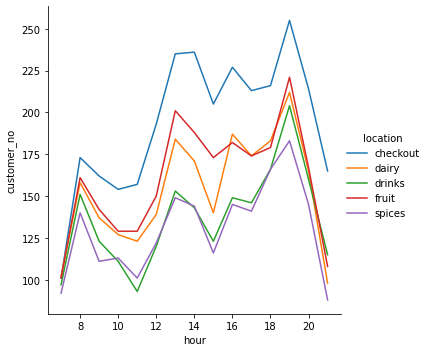

In [186]:
#barplot - number of customers in each section over time
total_customers_time = pd.DataFrame(df.groupby(["location","hour"])["customer_no"].nunique())
total_customers_time.reset_index(inplace=True)
sns.relplot(x="hour", y="customer_no", hue="location", kind="line", data=total_customers_time)

In [187]:
df.head()

,customer_no,location,hour,time,day,customer_id,section_order,timestamp
0,1,dairy,7.0,07:03:00,Monday,Monday-1,first,NaN
1,2,dairy,7.0,07:03:00,Monday,Monday-2,first,NaN
2,3,dairy,7.0,07:04:00,Monday,Monday-3,first,NaN
3,4,dairy,7.0,07:04:00,Monday,Monday-4,first,NaN
4,5,spices,7.0,07:04:00,Monday,Monday-5,first,NaN


In [188]:
#Customer behavior at diffrent hours of the day
df[df['location']!="checkout"].groupby('location').resample("30T").nunique()['customer_no'].unstack().plot(legend=False)
plt.title("customer behavior at different hours of the day")

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
df.reset_index(inplace=True)
df[df['location']=="checkout"].groupby("location").resample("15T").nunique()['customer_no'].reset_index().set_index("timestamp").plot()
plt.title("Amount of people at the checkout in an 15mins interval")

In [ ]:
df['diff'] = df.sort_values(['customer_no','timestamp']).groupby('customer_no')['timestamp'].diff()
df[df['diff'].notnull()][['customer_no','diff']].groupby('diff').nunique()['customer_no'].reset_index().set_index('diff').plot.bar()
plt.tite('How much time do customers spend in the market?')

In [ ]:
# Amount spent by each customer
df[df["diff"].notnull()][["customer_no","diff"]]

In [ ]:
df.resample("15T").nunique()["customer_no"].plot()
plt.title("Total customer numbers inside the market over time")

In [ ]:
df["customer_no"].nunique()
#1535 unique customers = max. nr of customers in a day

In [ ]:
df = pd.get_dummies(df, columns=['location'])
df['location_checkout'].sum()
df['location_dairy'].sum()
df['location_drinks'].sum()
df['location_fruit'].sum()
df['location_spices'].sum()

In [ ]:
# #missing customers from checkout
# checkout=set(data[data["location"]=="checkout"]["customer_no"].unique())
# all_c=set(data["customer_no"].unique())
# diff=all_c.difference(checkout)
# for cust in diff:
#                data=data.append({"timestamp":"2019-09-02 22:00:00","customer_no":'cust', 'location':"checkout"}, ignore_index=True)
#      data[data["timestamp"]=="2019-09-02 22:00:00"]

In [ ]:
# df = pd.DataFrame()
#days = ['friday', 'thursday', 'wednesday', 'tuesday', 'monday']
# for day in days:
#     df = pd.concat([pd.read_csv(f'data/{day}.csv', sep=';'), df])